In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

import datetime

In [ ]:
%store -r pca
%store -r pca_data

In [ ]:
X=pca_data[['PC1','PC2']].to_numpy()

In [ ]:
class MyKMeans:
    def __init__(self, n_clusters, n_init=20, max_iter=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.labels_ = None
        self.centroids_ = None

    def fit(self, X1):
        # Initialize the centroids randomly
        n_samples, n_features = X.shape
        np.random.seed(0)
        centroids = X1[np.random.choice(n_samples, self.n_clusters, replace=False), :]

        # Create a 4x5 grid of subplots
        fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))

        # Iterate until convergence or max iterations is reached
        for i, ax in enumerate(axes.flat):
            if i < self.max_iter:
                # Assign each point to the nearest centroid
                distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
                labels = np.argmin(distances, axis=0)

                # Update the centroids to the mean of the assigned points
                for j in range(self.n_clusters):
                    centroids[j] = X[labels == j, :].mean(axis=0)

                # Create a scatter plot with different colors for each cluster assignment
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
                ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)

                # Set the title of the subplot to the iteration number
                ax.set_title(f'Iteration {i+1}')

                # Hide the x and y axis labels and ticks for all subplots
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_xlabel('')
                ax.set_ylabel('')

        plt.show()
# Initialize and fit the custom KMeans object
my_kmeans = MyKMeans(n_clusters=4)
my_kmeans.fit(X)

## Behaviour Clustering Iteration over time

In [37]:
%store -r pca
%store -r pca_data

In [36]:
X=pca_data[['PC1','PC2']].to_numpy()

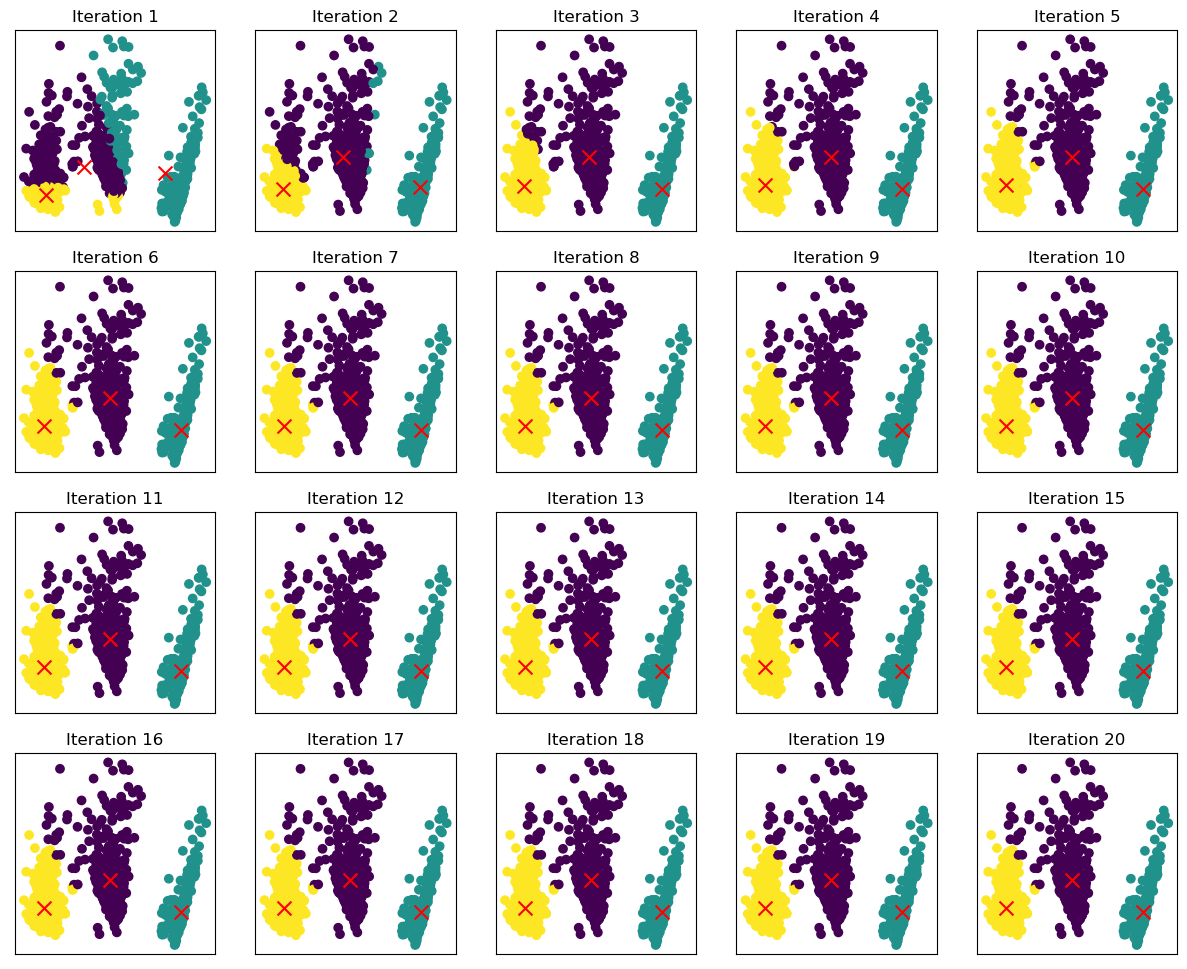

In [35]:
class MyKMeans:
    def __init__(self, n_clusters, n_init=20, max_iter=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.labels_ = None
        self.centroids_ = None

    def fit(self, X):
        # Initialize the centroids randomly
        n_samples, n_features = X.shape
        np.random.seed(0)
        centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False), :]

        # Create a 4x5 grid of subplots
        fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))

        # Iterate until convergence or max iterations is reached
        for i, ax in enumerate(axes.flat):
            if i < self.max_iter:
                # Assign each point to the nearest centroid
                distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
                labels = np.argmin(distances, axis=0)

                # Update the centroids to the mean of the assigned points
                for j in range(self.n_clusters):
                    centroids[j] = X[labels == j, :].mean(axis=0)

                # Create a scatter plot with different colors for each cluster assignment
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
                ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)

                # Set the title of the subplot to the iteration number
                ax.set_title(f'Iteration {i+1}')

                # Hide the x and y axis labels and ticks for all subplots
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_xlabel('')
                ax.set_ylabel('')

        plt.show()
# Initialize and fit the custom KMeans object
my_kmeans = MyKMeans(n_clusters=3)
my_kmeans.fit(X)